In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load the data from CSV
data = pd.read_csv('sensor_data.csv')

# Preview the data
data.head()

,Timestamp,Gyro_X,Gyro_Y,Gyro_Z,Accel_X,Accel_Y,Accel_Z,Label
0,11000,1.80,-1.04,4.76,0.19,0.93,-0.11,Wrong
1,12000,1.28,0.73,8.12,0.28,0.94,0.01,Wrong
2,12541,1.22,2.62,1.28,0.07,0.41,0.93,Correct
3,12646,0.06,-1.04,2.26,0.01,0.98,0.08,Correct
4,13000,5.86,5.68,4.39,0.32,0.99,-0.15,Wrong


In [5]:
# Drop participant and timestamp columns
data = data.drop(columns=['Timestamp'])

# Map 'correct' and 'wrong' labels to 1 and 0
data['Label'] = data['Label'].map({'Correct': 1, 'Wrong': 0})

# Normalise the gyroscope data (X, Y, Z) by subtracting the mean and dividing by the standard deviation
data[['Gyro_X', 'Gyro_Y', 'Gyro_Z']] = (data[['Gyro_X', 'Gyro_Y', 'Gyro_Z']] - data[['Gyro_X', 'Gyro_Y', 'Gyro_Z']].mean()) / data[['Gyro_X', 'Gyro_Y', 'Gyro_Z']].std()

# Normalise the accelerometer data (X, Y, Z) by subtracting the mean and dividing by the standard deviation
data[['Accel_X', 'Accel_Y', 'Accel_Z']] = (data[['Accel_X', 'Accel_Y', 'Accel_Z']] - data[['Accel_X', 'Accel_Y', 'Accel_Z']].mean()) / data[['Accel_X', 'Accel_Y', 'Accel_Z']].std()

# Calculate the magnitude of the gyroscope data (X, Y, Z)
data['Gyro_magnitude'] = np.sqrt(data['Gyro_X']**2 + data['Gyro_Y']**2 + data['Gyro_Z']**2)

# Calculate the magnitude of the accelerometer data (X, Y, Z)
data['Accel_magnitude'] = np.sqrt(data['Accel_X']**2 + data['Accel_Y']**2 + data['Accel_Z']**2)

# Update the feature set to include the gyroscope and accelerometer data, along with their magnitudes
features = data[['Gyro_X', 'Gyro_Y', 'Gyro_Z', 'Gyro_magnitude', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Accel_magnitude']]

# Separate the features and labels
X = features
y = data['Label']

# Check the processed data
X.head(), y.head()


(     Gyro_X    Gyro_Y    Gyro_Z  Gyro_magnitude   Accel_X   Accel_Y   Accel_Z  \
 0  0.686361 -0.121395  2.223081        2.329789  0.670630  1.224176 -1.917715   
 1  0.337549  0.554424  4.568636        4.614516  1.345352  1.251721 -1.619327   
 2  0.297302  1.276062 -0.206244        1.326370 -0.229000 -0.208161  0.668316   
 3 -0.480818 -0.121395  0.477876        0.688686 -0.678815  1.361901 -1.445267   
 4  3.409780  2.444427  1.964790        4.632734  1.645229  1.389446 -2.017178   
 
    Accel_magnitude  
 0         2.371916  
 1         2.449285  
 2         0.736491  
 3         2.098657  
 4         2.950652  ,
 0    0
 1    0
 2    1
 3    1
 4    0
 Name: Label, dtype: int64)

In [13]:
# Calculate the mean and standard deviation for each feature (Gyro_X, Gyro_Y, Gyro_Z, Accel_X, Accel_Y, Accel_Z)
gyro_features = ['Gyro_X', 'Gyro_Y', 'Gyro_Z']
accel_features = ['Accel_X', 'Accel_Y', 'Accel_Z']

# Calculate mean and std for gyroscope features
gyro_mean = data[gyro_features].mean()
gyro_std = data[gyro_features].std()

# Calculate mean and std for accelerometer features
accel_mean = data[accel_features].mean()
accel_std = data[accel_features].std()

# Print the results
print("Gyroscope Mean:", gyro_mean)
print("Gyroscope Standard Deviation:", gyro_std)
print("Accelerometer Mean:", accel_mean)
print("Accelerometer Standard Deviation:", accel_std)

Gyroscope Mean: Gyro_X    3.081435e-17
Gyro_Y    4.350262e-17
Gyro_Z   -2.401707e-17
dtype: float64
Gyroscope Standard Deviation: Gyro_X    1.0
Gyro_Y    1.0
Gyro_Z    1.0
dtype: float64
Accelerometer Mean: Accel_X    4.350262e-17
Accel_Y    1.450087e-16
Accel_Z    3.081435e-17
dtype: float64
Accelerometer Standard Deviation: Accel_X    1.0
Accel_Y    1.0
Accel_Z    1.0
dtype: float64


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split data sizes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1568, 8), (392, 8), (1568,), (392,))

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(48, activation='relu', input_shape=(X_train.shape[1],)),  # 64 neurons in the hidden layer
    Dense(32, activation='relu'),                                  # Another hidden layer
    Dense(1, activation='sigmoid')                                  # Sigmoid for binary classification (correct or wrong)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 48)                432       
                                                                 
 dense_7 (Dense)             (None, 32)                1568      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,033
Trainable params: 2,033
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.6262 - accuracy: 0.6129 - val_loss: 0.5581 - val_accuracy: 0.8036
Epoch 2/10
49/49 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.8125 - val_loss: 0.4298 - val_accuracy: 0.8469
Epoch 3/10
49/49 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8967 - val_loss: 0.3125 - val_accuracy: 0.9592
Epoch 4/10
49/49 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9707 - val_loss: 0.2306 - val_accuracy: 0.9719
Epoch 5/10
49/49 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9751 - val_loss: 0.1731 - val_accuracy: 0.9694
Epoch 6/10
49/49 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9783 - val_loss: 0.1301 - val_accuracy: 0.9770
Epoch 7/10
49/49 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9790 - val_loss: 0.1071 - val_accuracy: 0.9847
Epoch 8/10
49/49 [==

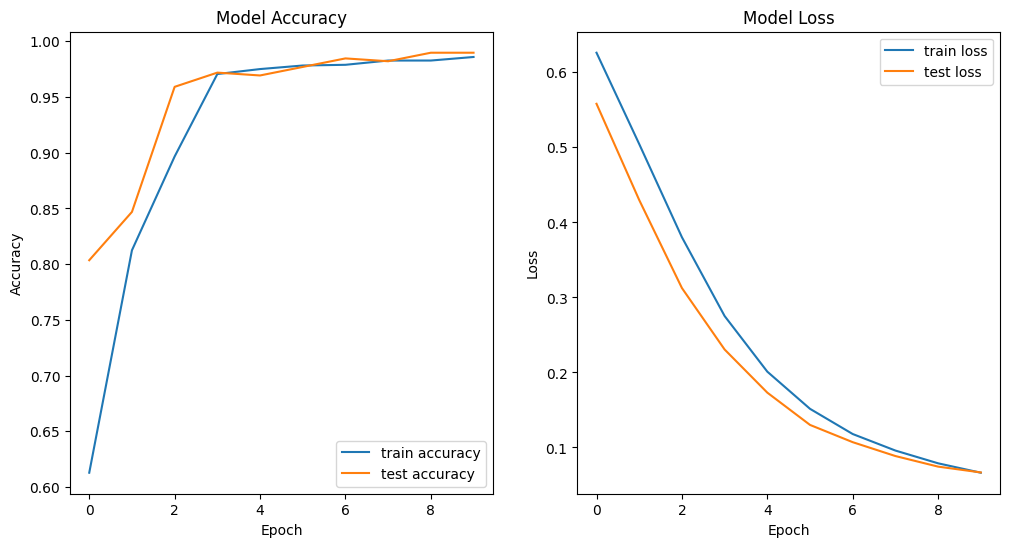

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [16]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

13/13 [==============================] - 0s 1ms/step - loss: 0.0668 - accuracy: 0.9898
Test Accuracy: 98.98%
Test Loss: 0.0668


In [17]:
# Save the model to an HDF5 file
model.save('posture_model.h5')

In [18]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('posture_model.h5')

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Convert TensorFlow Lite model to C array
with open('posture_model.tflite', 'rb') as f:
    byte_array = f.read()

# Save the array to a header file
with open('model_tflite.h', 'w') as header_file:
    header_file.write('const unsigned char model_tflite[] PROGMEM = {')
    for byte in byte_array:
        header_file.write(f'{byte}, ')
    header_file.write('};')

INFO:tensorflow:Assets written to: C:\Users\n55iw\AppData\Local\Temp\tmp7c_e8imk\assets


INFO:tensorflow:Assets written to: C:\Users\n55iw\AppData\Local\Temp\tmp7c_e8imk\assets
